In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.text import *

In [0]:
!pip3 install pandas_ods_reader

     |████████████████████████████████| 133kB 3.7MB/s 
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49002 sha256=9a29c6b6425937e8db364e4dc3f58d67241ac6766950f5a4534480017e72b73a
  Stored in directory: /root/.cache/pip/wheels/c9/6c/f9/107d39d45441980bf273757eba003ef057c6193c9d7650fac7
Successfully built ezodf


In [0]:
from pandas_ods_reader import read_ods

In [0]:
data = read_ods("/content/Hindi_Sentiment_Analysis/hi_3500.ods", 1, headers=False)

In [0]:
data.head(),data.shape[0]

(                                            column_0  column_1
 0  लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...  negative
 1  गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...  negative
 2  ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है  negative
 3  यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...  negative
 4  अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...  negative, 9077)

In [0]:
table = data.copy().sample(9077, random_state=0,replace=False)
table = table[['column_0', 'column_1']]
table.dropna(inplace=True)
table[1:10]

,column_0,column_1
3614,उन्‍होंने एक छोर संभालते हुए तेजतर्रार पारी खे...,positive
2405,RT @itsparvezsagar: शाहदरा बार एसोसिएशन के अध्...,neutral
8173,RT @aajtak: क्या राहुल गांधी दे सकते हैं मोदी ...,neutral
4319,डुमिनी ही एकमात्र ऐसे बल्लेबाज नजर आ रहे हैं ज...,negative
5322,इस चुनाव में बीजेपी ने मोदी की ब्रांडिंग करने ...,positive
5671,हर साल कुछ नया लाकर वे सबको चकित कर देते हैं इ...,positive
6680,सरकार अब तक ज्यादा लिए गए पैसों में से महज 40 ...,negative
4359,तीन दिन की तपिश से राहत मिली है लेकिन अब पारा ...,negative
3148,आज से पितर पक्ष शुरू हो रहा है अपने पूर्वजो के...,negative


In [0]:
# create databunch
data_lm = (TextList.from_df(table, cols='column_0')
 .split_by_rand_pct(0.1)
 .label_for_lm()
 .databunch())

In [0]:
data_clas = (TextList.from_df(table, cols='column_0', vocab=data_lm.vocab)
 .split_by_rand_pct(0.1)
 .label_from_df('column_1')
 .databunch())

In [0]:
data_clas.show_batch(1)

text,target
xxbos xxup rt @theworldindex : xxmaj world most polluted cities 2018 : \n \n 1 . 🇮 🇳 xxmaj gurugram \n 2 . 🇮 🇳 xxmaj ghaziabad \n 3 . 🇵 🇰 xxmaj faisalabad \n 4 . 🇮 🇳 xxmaj faridabad \n 5 . 🇮 🇳 xxmaj bhiwadi \n 6 . 🇮 🇳 xxmaj noida \n 7 . …,negative


In [0]:
data_lm.show_batch(2)

idx,text
0,": क्या राहुल गांधी दे सकते हैं मोदी को टक्कर , # hallabol के इस बहस में एक दिन के एंकर बने @singhrpn , देखिए शाम 6 बजे xxunk … xxbos डुमिनी ही एकमात्र ऐसे बल्लेबाज नजर आ रहे हैं जो थोड़ा बहुत लय में हैं , xxbos तीन दिन की xxunk से राहत मिली है लेकिन अब पारा फिर चढ़ने लगा है । xxbos आज से xxunk पक्ष शुरू"
1,. xxbos हर xxunk xxunk के पास पानी का xxunk होना अनिवार्य है । xxbos क्या श्रीदेवी की मौत का अमिताभ को पहले ही हो गया था xxunk ? xxmaj big xxmaj story | xxmaj ne ... https : / / t.co / xxunk via @youtube xxbos नाम बड़े पर दर्शन छोटे - xxunk xxbos कागजों में कर रहे xxunk जानकार सूत्रों ने बताया कि अधिकारी अतिक्रमण के विरूद्ध कार्रवाई


In [0]:
data_lm.save('data_lm.pkl')
data_lm.vocab.save('data_lm_vocab.pkl')

In [0]:
from fastai.callbacks import CSVLogger
learn = language_model_learner(data_lm, AWD_LSTM, pretrained="/content/drive/My Drive/Copy of third_hi_lm.pth", drop_mult=0.5,callback_fns=[CSVLogger])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
None
None


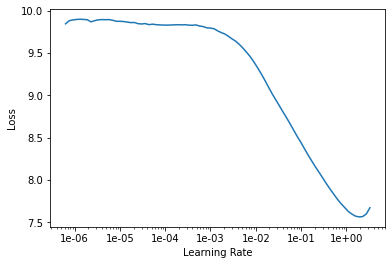

In [0]:
print(learn.lr_find())
print(learn.recorder.plot())

In [0]:
learn.fit_one_cycle(5, 2e-02, moms=(0.8, 0.7)) 

epoch,train_loss,valid_loss,accuracy,time
0,7.053196,5.089117,0.253259,00:04
1,5.575044,4.454251,0.309955,00:04
2,4.815879,4.168030,0.330446,00:04
3,4.295842,4.034453,0.342366,00:04
4,3.961227,4.016305,0.343661,00:04


In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 2e-03, moms=(0.8, 0.7)) 

epoch,train_loss,valid_loss,accuracy,time
0,3.585049,3.931443,0.355179,00:05
1,3.408461,3.804306,0.368929,00:05
2,3.214203,3.751908,0.376875,00:05
3,2.983126,3.747255,0.380938,00:05


In [0]:
TEXT = " में"
N_WORDS = 30
N_SENTENCES = 1

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

 में ये है जब इस पर विदेश विदेश पर मंत्री सुधार कर सके है , मैं नहीं होगा भारत - गुजरात या न जाए ! 
  # hallabol लाइव : https


In [0]:
learn.export("models/hi_sentence.pkl")
learn.save_encoder('fine_tuned_enc_9077')

In [0]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn_clas.load_encoder('fine_tuned_enc_9077')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8170 items)
x: TextList
xxbos अब अरब देशों से रुपये xxunk के लिए दिनभर का इंतजार नहीं करना पड़ेगा ।,xxbos उन्‍होंने एक छोर xxunk हुए xxunk पारी खेली और दिल्‍ली की जीत पर मुहर लगा दी ।,xxbos xxup rt @itsparvezsagar : शाहदरा बार एसोसिएशन के अध्यक्ष के घर हमला , बेखौफ बदमाशों का xxunk https : / / t.co / xxunk 
  - 
  @aajtak @jurmaajtak xxunk …,xxbos xxup rt @aajtak : क्या राहुल गांधी दे सकते हैं मोदी को टक्कर , # hallabol के इस बहस में एक दिन के एंकर बने @singhrpn , देखिए शाम 6 बजे xxunk …,xxbos डुमिनी ही xxunk ऐसे बल्लेबाज नजर आ रहे हैं जो थोड़ा बहुत लय में हैं ,
y: CategoryList
positive,positive,neutral,neutral,negative
Path: .;

Valid: LabelList (907 items)
x: TextList
xxbos आंध्र प्रदेश xxunk के एक xxunk ने कहा , ' xxunk ने xxunk के समर्थन में आवाज बुलंद नहीं की होती , अगर उन्हें मंत्री पद मिल गया होता ।,xxbos बच्चों को प्रशिक्षण देने वाले ये लोग फुटबॉल की दुनिया के माहिर खिलाड़ी हैं,xxbos xxup rt @aajtak : # xxmaj modi4 रविशंकर प

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


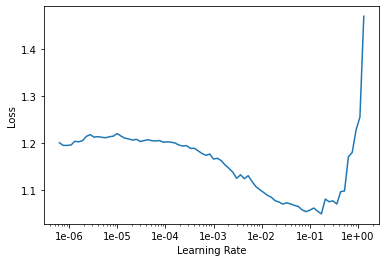

In [0]:
learn_clas.lr_find()
learn_clas.recorder.plot()

In [0]:
learn_clas.fit_one_cycle(3, 2e-02, moms=(0.8,0.7)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.830881,0.629811,0.684675,00:08
1,0.787553,0.567552,0.725469,00:08
2,0.751054,0.561182,0.734289,00:08


In [0]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-03/(2.6**4),1e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.809582,0.550436,0.737596,00:09


In [0]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(3, slice(5e-03/(2.6**4),5e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.755978,0.521894,0.748622,00:15
1,0.637756,0.451949,0.785006,00:16
2,0.553773,0.436900,0.807056,00:15


In [0]:
learn_clas.unfreeze()
learn_clas.fit_one_cycle(5, slice(5e-04/(2.6**4),5e-04), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.499995,0.426364,0.805954,00:20
1,0.494149,0.421116,0.811466,00:22
2,0.470588,0.414140,0.820287,00:21
3,0.487782,0.414364,0.812569,00:19
4,0.462538,0.407951,0.822492,00:20


In [0]:
dir(learn_clas.fit_one_cycle(1, slice(5e-04/(2.6**4),5e-04), moms=(0.8,0.7)))

epoch,train_loss,valid_loss,accuracy,time
0,0.726616,0.532344,0.751929,00:08


['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

NoneType

In [0]:
# learn_clas.save("classifier_sentiment_hi_v10.pth")
learn_clas.save("trained_model", return_path=True)


PosixPath('models/trained_model.pth')

In [0]:
t=learn_clas.predict("आज़तक पर देखिये कितनी स्मार्ट हुई स्मार्ट फेंसिंग Exclusive आज रात 9.30 pm पर @BSF_India")

In [0]:
for i in t:
  print(i)
t[0]

positive
tensor(2)
tensor([4.2307e-04, 3.9472e-11, 9.9958e-01])


Category tensor(2)

In [0]:
t

(Category tensor(2), tensor(2), tensor([1.7175e-05, 6.1461e-18, 9.9998e-01]))

In [0]:
p=learn_clas.predict("चीन के सामने भारत के जांबाज़ सूरमाओं की Exclusive रिपोर्ट कोल्ड डेजर्ट के नाम से मशहूर नेलांग वैली से।… https://t.co/7JBdsL6xaE")

In [0]:
for i in p:
  print(i)

positive
tensor(2)
tensor([3.6274e-04, 2.7123e-08, 9.9964e-01])


In [0]:
l=learn_clas.predict("Female IAS officer molestation दिल्लीः साकेत कोर्ट परिसर में महिला IAS अधिकारी से छेड़छाड़ https://t.co/MtZhnAfYiV")

In [0]:
for i in l:
  print(i)

negative
tensor(0)
tensor([0.4710, 0.4470, 0.0820])


In [0]:
from fastai.vision import *

In [0]:
preds,y,losses = learn_clas.get_preds(with_loss=True)

In [0]:
inp = ClassificationInterpretation(learn_clas,preds,y,losses)

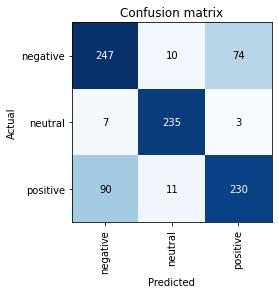

In [0]:
inp.plot_confusion_matrix()

In [0]:
inp.top_losses(k=1,largest=True)

torch.return_types.topk(values=tensor([5.0993]), indices=tensor([482]))

##**BACKWARDS**

In [0]:
data_lm_bwd = (TextList.from_df(table, cols='column_0')
 .split_by_rand_pct(0.1)
 .label_for_lm()
 .databunch(backwards=True))

In [0]:
data_clas_bwd = (TextList.from_df(table, cols='column_0', vocab=data_lm_bwd.vocab)
 .split_by_rand_pct(0.1)
 .label_from_df('column_1')
 .databunch(backwards=True))

In [0]:
data_lm_bwd.show_batch(2)

idx,text
0,"रहे मान खुशनसीब को खुद लोग वाले करने पास परीक्षा जबकि , हैं रहे हो फेल ज्यादा से प्रतिशत 50 से उनमें xxbos xxunk / t.co / / : https मौत दर्दनाक , कुमार सुरेश xxunk xxup कूदे से मंजिल चौथी xxunk होटल xxbos … @aaj देखिए । xxunk मशीन evm xxup से xxunk एक पिछले में xxunk xxunk xxunk के स्कूल xxunk xxunk में सीट लोकसभा xxunk सिविल की"
1,"है क्या से सरकार की लोगों सुनिए . है गया किया शिफ्ट में xxunk को लोगों रहे रह पास के यमुना हुए देखते को खतरे के बाढ़ में दिल्ली : @aajtak rt xxup xxbos भी पे xxunk जैसे xxunk बेशर्म और एंकर जैसे xxunk हुए xxunk xxbos . था किया दुखी उन्हें ने जस्टिन जैसे ही वैसे ठीक , हैं चाहती xxunk दुख ज्यादा से ज्यादा को जस्टिन वह xxbos"


In [0]:
data_clas_bwd.show_batch(2)

text,target
… . 7 \n noida xxmaj 🇳 🇮 . 6 \n bhiwadi xxmaj 🇳 🇮 . 5 \n faridabad xxmaj 🇳 🇮 . 4 \n faisalabad xxmaj 🇰 🇵 . 3 \n ghaziabad xxmaj 🇳 🇮 . 2 \n gurugram xxmaj 🇳 🇮 . 1 \n \n : 2018 cities polluted most world xxmaj : @theworldindex rt xxup xxbos,negative
… . 7 \n noida xxmaj 🇳 🇮 . 6 \n bhiwadi xxmaj 🇳 🇮 . 5 \n faridabad xxmaj 🇳 🇮 . 4 \n faisalabad xxmaj 🇰 🇵 . 3 \n ghaziabad xxmaj 🇳 🇮 . 2 \n gurugram xxmaj 🇳 🇮 . 1 \n \n : 2018 cities polluted most world xxmaj : @theworldindex rt xxup xxbos,negative


In [0]:
data_lm_bwd.save('data_lm_bwd.pkl')
data_lm_bwd.vocab.itos[:3]

['xxunk', 'xxpad', 'xxbos']

In [0]:
learn_bwd = language_model_learner(data_lm_bwd, AWD_LSTM, pretrained="/content/drive/My Drive/Copy of third_hi_lm.pth", drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


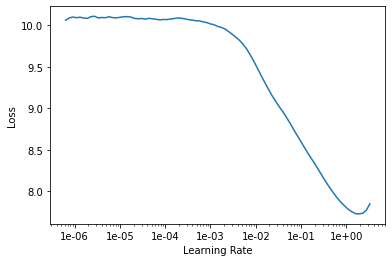

In [0]:
learn_bwd.lr_find()
learn_bwd.recorder.plot()

In [0]:
learn_bwd.fit_one_cycle(3, 2e-02, moms=(0.8, 0.7)) # uska 0.28 tha acc and lr 3e-02 tha

epoch,train_loss,valid_loss,accuracy,time
0,6.580463,4.783374,0.290000,00:14
1,5.279812,4.244801,0.324732,00:14
2,4.639399,4.138621,0.333036,00:14


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


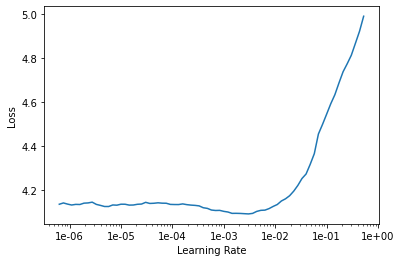

In [0]:
learn_bwd.unfreeze()
learn_bwd.lr_find()
learn_bwd.recorder.plot(skip_end=15)

In [0]:
learn_bwd.fit_one_cycle(5, 2e-03, moms=(0.8, 0.7)) # 15 epochs 0.33 acc lr= 3e-03

epoch,train_loss,valid_loss,accuracy,time
0,4.071650,4.143243,0.327054,00:18
1,3.928457,3.846760,0.361384,00:18
2,3.692987,3.743894,0.373125,00:18
3,3.458560,3.681328,0.381071,00:18
4,3.258313,3.670271,0.383527,00:18


In [0]:
learn_bwd.export("models/hi_sentence_bwd.pkl")
learn_bwd.save_encoder('fine_tuned_enc_9077_bwd')

In [0]:
learn_clas_bwd = text_classifier_learner(data_clas_bwd, AWD_LSTM, drop_mult=0.5)
learn_clas_bwd.load_encoder('fine_tuned_enc_9077_bwd')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8170 items)
x: TextList
xxbos अब अरब देशों से रुपये xxunk के लिए दिनभर का इंतजार नहीं करना पड़ेगा ।,xxbos xxup rt @itsparvezsagar : शाहदरा बार xxunk के अध्यक्ष के घर हमला , बेखौफ बदमाशों का xxunk https : / / t.co / xxunk 
  - 
  @aajtak @jurmaajtak xxunk …,xxbos xxup rt @aajtak : क्या राहुल गांधी दे सकते हैं मोदी को टक्कर , # hallabol के इस बहस में एक दिन के एंकर बने @singhrpn , देखिए शाम 6 बजे xxunk …,xxbos डुमिनी ही एकमात्र ऐसे बल्लेबाज नजर आ रहे हैं जो थोड़ा बहुत लय में हैं ,,xxbos इस चुनाव में बीजेपी ने मोदी की xxunk करने में कोई कसर बाकी नहीं रखी है .
y: CategoryList
positive,neutral,neutral,negative,positive
Path: .;

Valid: LabelList (907 items)
x: TextList
xxbos अखलाक हत्या मामला : आरोपी विशाल के पिता ने की सुबोध सिंह की तारीफ - xxmaj india aajtak https : / / t.co / xxunk,xxbos xxunk क्षेत्र के xxunk पंचायत के xxunk गांव निवासी xxunk पिता xxunk आदिवासी ने यह कारनामा करके दिखाया हैं ।,xxbos xxup rt @aajtak : देखिए , संबित पात

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


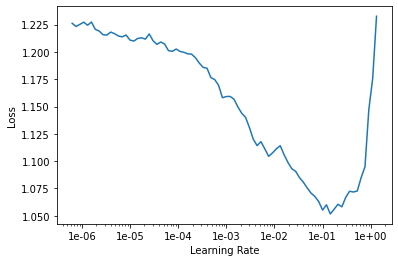

In [0]:
learn_clas_bwd.lr_find()
learn_clas_bwd.recorder.plot()

In [0]:
learn_clas_bwd.fit_one_cycle(5, 2e-02, moms=(0.8,0.7)) # uski accuracy 0.64 with lr=3e-2

epoch,train_loss,valid_loss,accuracy,time
0,0.910164,0.763738,0.609702,00:08
1,0.923617,0.789706,0.603087,00:07
2,0.893549,0.675666,0.673649,00:07
3,0.859619,0.669671,0.685777,00:08
4,0.786006,0.676056,0.675854,00:08


In [0]:
learn_clas_bwd.freeze_to(-2)
learn_clas_bwd.fit_one_cycle(1, slice(1e-03/(2.6**4),1e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.854344,0.656486,0.681367,00:09


In [0]:
learn_clas_bwd.freeze_to(-3)
learn_clas_bwd.fit_one_cycle(3, slice(5e-03/(2.6**4),5e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.783576,0.650076,0.702315,00:15
1,0.699730,0.549755,0.736494,00:16
2,0.610284,0.532362,0.749724,00:16


In [0]:
learn_clas_bwd.freeze_to(-3)
learn_clas_bwd.fit_one_cycle(3, slice(5e-03/(2.6**4),5e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.628010,0.520514,0.744212,00:15
1,0.588390,0.490456,0.762955,00:15
2,0.528880,0.485482,0.781698,00:14


In [0]:
preds,targs = learn_clas.get_preds(ordered=True)
accuracy(preds,targs)

tensor(0.7850)

In [0]:
preds_b,targs_b = learn_clas_bwd.get_preds(ordered=True)
accuracy(preds_b,targs_b)

tensor(0.7817)

In [0]:
preds_avg = (preds+preds_b)/2

In [0]:
accuracy(preds_avg,targs_b)

tensor(0.7817)

In [0]:
from fastai.text import *
from pandas_ods_reader import read_ods

#'आज़तक पर देखिये कितनी स्मार्ट हुई स्मार्ट फेंसिंग Exclusive आज रात 9.30 pm पर @BSF_India'
def predict_sentiment(test_str):
  l = load_learner('/content/', 'classifier_sentiment_hi_v10.pkl')

  pred=(l.predict(test_str))
  if int(pred[0])==2:
    print(float(max(list(pred[2]))))
    print('positive')
  elif int(pred[0])==0:
    print(float(max(list(pred[0]))))
    print('negative')
  elif int(pred[0])==1:
    print(float(max(list(pred[1]))))
    print('neutral')

test_str='आज़तक पर देखिये कितनी स्मार्ट हुई स्मार्ट फेंसिंग Exclusive आज रात 9.30 pm पर @BSF_India'
predict_sentiment(test_str)

0.999576985836029
positive


# **TESTING OF MODEL**

In [0]:
test_pos = read_ods("/content/Hindi_Sentiment_Analysis/positive.ods",1, headers=False)

In [0]:
test_pos

,column_0,column_1,column_2,column_3,column_4,column_5
0,मुमकिन है कि रिलायंस कैपिटल का शेयर 330 रुपये ...,positive,बुंदेलखंड के किसानों को अबकी बार बड़ी उम्मीदें...,negative,"RT @mumbaitak: शिवसेना-बीजेपी गठबंधन में दरार,...",neutral
1,सितम्बर में इसकी कमिशिनिंग संभावित है।,positive,उन्होंने कहा कि चूंकि पूंजी की जरूरत बहुत बड़ी...,negative,"RT @mumbaitak: शिवसेना-बीजेपी गठबंधन में दरार,...",neutral
2,भारतीय कंपनी ने संभावित डील के बारे में कमेंट ...,positive,पश्चिम बंगाल में शासन द्वारा ऐसी शिकायतें लगात...,negative,RT @mumbaitak: बोरवेल में फंसे 6 साल के मासूम ...,neutral
3,हम अदालत में लड़ाई लड़ने के अलावा इस मामले को ...,positive,शहर में नेटवर्किंग कारोबार का मकड़जाल लगातार फ...,negative,RT @mumbaitak: बीजेपी-शिवसेना गठबंधन पर उद्धव ...,neutral
4,असल में कोशिश की जा रही है कि संभावित तौर पर क...,positive,हमें नहीं लगता कि आने वाले दिनों में कीमतों मे...,negative,RT @mumbaitak: ठाणे के कोरम मॉल में घुसा तेंदु...,neutral
...,...,...,...,...,...,...
680,ज्यादातर लोग गोरी बहू पसंद करते हैं,positive,हर कोई अपनी जिम्मेवारी से पल्ला झाड़ता नजर आ र...,negative,"अयोध्या में प्रियंका, कांग्रेस बजा रही ‘हिंदुत...",neutral
681,पानी रिमझिम बरस रहा है,positive,मंडी आढ़ती गेहू में घटोतरी के लिए किसी प्रकार ...,negative,RT @Shivendrak: #बहारेंहमकोढूंढेगी ⁦⁦@Akashvan...,neutral
682,यह देश आभारी है उन वीरों का जो देश की सुरक्षा ...,positive,निगम यह बात कहकर अपनी जिम्मेवारी से नहीं भाग स...,negative,राजनीति के मौसम में छूटे न कोई खबर। हर खबर है ...,neutral
683,महात्माजी बहुत तेजस्वी हैं,positive,राहुल द्रविड़ ने टीम की कमान संभाली थी और शानद...,negative,RT @AalokTweet: “किसी के पैरों पर गिर कर मंज़ि...,neutral


In [0]:
result = []
count_pos=0
count_pos_neg=0
count_neg=0
count_neg_pos=0
count_neu=0
count_neu_pos=0
for text in test_pos.column_0:
  #print(str(learn.predict(str(text))[0]))
  if str(learn.predict(str(text))[0]) == "positive":
    count_pos+=1
  if str(learn.predict(str(text))[0]) == "negative":
    count_pos_neg+=1
    
for text in test_pos.column_2:
  #print(str(learn.predict(str(text))[0]))
  if str(learn.predict(str(text))[0]) == "negative":
    count_neg+=1
  if str(learn.predict(str(text))[0]) == "positive":
    count_neg_pos+=1
    
for text in test_pos.column_4:
  #print(str(learn.predict(str(text))[0]))
  if str(learn.predict(str(text))[0]) == "neutral":
    count_neu+=1
  if str(learn.predict(str(text))[0]) == "positive":
    count_neu_pos+=1

  

**Positive Set**

In [0]:
count_pos/686 , count_pos_neg/686 , 1-count_pos/686-count_pos_neg/686

(0.565597667638484, 0.4329446064139942, 0.0014577259475218596)

**Negative Set**

In [0]:
count_neg/686 , count_neg_pos/686 , 1-count_neg/686-count_neg_pos/686

(0.793002915451895, 0.2055393586005831, 0.0014577259475218596)

**Neutral Set**

In [0]:
count_neu/686 , count_neu_pos/686 , 1-count_neu/686-count_neu_pos/686

(0.8221574344023324, 0.16034985422740525, 0.017492711370262398)